<a href="https://colab.research.google.com/github/amanickam/pgaiml/blob/master/plant_seedlings_v2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 1. Import the libraries, load dataset, print shape of data, visualize the images in dataset.

In [196]:
# Importing Libraries
%matplotlib inline
import os

import matplotlib.pyplot as plt
import pandas as pd
import cv2
import numpy as np
from glob import glob
import seaborn as sns

In [6]:
# loading Files

x_images = []
y_classes=[]
missing=0
TRAin_DATA_FOLDER='/content/drive/MyDrive/Colab Notebooks/CNN Project/plant-seedlings-classification/train'
for class_folder_name in os.listdir(TRAin_DATA_FOLDER):
    class_folder_path = os.path.join(TRAin_DATA_FOLDER, class_folder_name)
    class_label = class_folder_name
    
    for image_path in glob(os.path.join(class_folder_path, "*.png")):
        image_bgr = cv2.imread(image_path, cv2.IMREAD_COLOR)
        if image_bgr is None: # if the file contain any missig value ignore it
          missing += 1
          continue
        x_images.append(image_bgr)
        
        
        y_classes.append(class_label)

In [156]:
# counting the number of files in each class
for label in set(y_classes):
  print("number of {} images is  -> {}".format(
        label, 
        len(images[classes == label])))

number of Cleavers images is  -> 285
number of Scentless Mayweed images is  -> 512
number of Fat Hen images is  -> 456
number of Small-flowered Cranesbill images is  -> 491
number of Black-grass images is  -> 187
number of Common wheat images is  -> 198
number of Loose Silky-bent images is  -> 592
number of Maize images is  -> 178
number of Common Chickweed images is  -> 611
number of Charlock images is  -> 343
number of Sugar beet images is  -> 308
number of Shepherds Purse images is  -> 220


# Checking the length and shape

In [157]:
len(x_images)

4381

In [158]:
print(y_classes)

['Common Chickweed' 'Common Chickweed' 'Common Chickweed' ... 'Cleavers'
 'Cleavers' 'Cleavers']


In [159]:
x_images.shape

(4381,)

In [160]:
x_images[0].shape

(100, 100, 3)

In [139]:
def resize_images(img):

  img = np.array(img).astype(np.uint8)
  res = cv2.resize(img,(128,128), interpolation = cv2.INTER_CUBIC)
  return res




In [140]:
resized_x_images=[]
for img in x_images:
  resized_x_images.append(resize_images(img))


In [141]:
resized_x_images[0].shape

(128, 128, 3)

In [142]:
len(resized_x_images)

4381

#Show the images before resizing

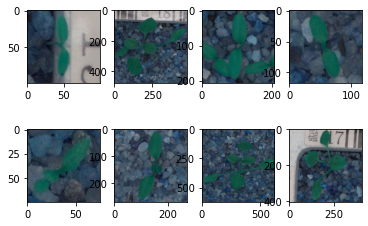

In [17]:
for i in range(8):
  plt.subplot(2,4,i+1)
  plt.imshow(x_images[i])

#Show the images post resizing

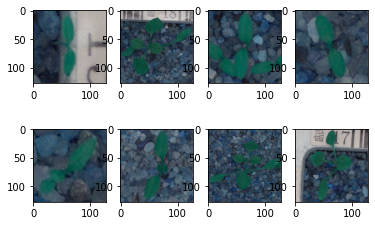

In [16]:
for i in range(8):
  plt.subplot(2,4,i+1)
  plt.imshow(resized_x_images[i])

#Data Pre-processing: (15 Marks)
    a.Normalization.
    b.Gaussian Blurring.
    c.Visualize data after pre-processing

In [49]:
# Guassian Blurring
blurred_resized_x_images=[]
for img in resized_x_images:
  blurred_resized_x_images.append(cv2.GaussianBlur (img,(5,5),0))




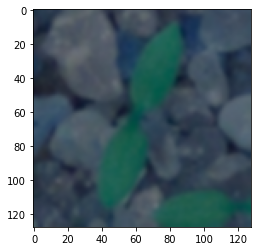

In [50]:
# Viewing image post Guassian Blurring
plt.imshow(blurred_resized_x_images[51])

In [52]:
# Normalizing the data
norm_blurred_resized_x_images=[]
for img in blurred_resized_x_images:
  norm_blurred_resized_x_images.append(img/255.0)


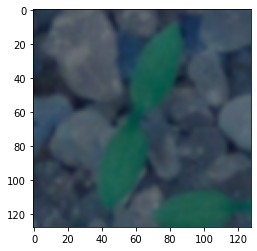

In [53]:
# Vieweing the image post Nomalizing
plt.imshow(norm_blurred_resized_x_images[51])

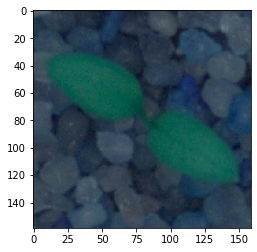

In [56]:
#preprocessed data 
plt.imshow(x_images[101])


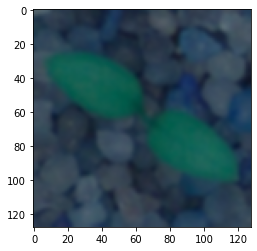

In [100]:
#post processed data 
plt.imshow(norm_blurred_resized_x_images[101])

In [101]:
x=norm_blurred_resized_x_images

In [119]:
print (type(x))

<class 'list'>


#3. Make data compatible, split training & test

In [91]:
print (y_classes)

['Common Chickweed', 'Common Chickweed', 'Common Chickweed', 'Common Chickweed', 'Common Chickweed', 'Common Chickweed', 'Common Chickweed', 'Common Chickweed', 'Common Chickweed', 'Common Chickweed', 'Common Chickweed', 'Common Chickweed', 'Common Chickweed', 'Common Chickweed', 'Common Chickweed', 'Common Chickweed', 'Common Chickweed', 'Common Chickweed', 'Common Chickweed', 'Common Chickweed', 'Common Chickweed', 'Common Chickweed', 'Common Chickweed', 'Common Chickweed', 'Common Chickweed', 'Common Chickweed', 'Common Chickweed', 'Common Chickweed', 'Common Chickweed', 'Common Chickweed', 'Common Chickweed', 'Common Chickweed', 'Common Chickweed', 'Common Chickweed', 'Common Chickweed', 'Common Chickweed', 'Common Chickweed', 'Common Chickweed', 'Common Chickweed', 'Common Chickweed', 'Common Chickweed', 'Common Chickweed', 'Common Chickweed', 'Common Chickweed', 'Common Chickweed', 'Common Chickweed', 'Common Chickweed', 'Common Chickweed', 'Common Chickweed', 'Common Chickweed',

In [87]:
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y = enc.fit_transform(y)

In [161]:
print (type(x))
print (type(y))


<class 'list'>
<class 'numpy.ndarray'>


In [162]:
# Converting list of images into np array
x=np.array(x)

In [164]:
print (type(x))
print ((x.shape))
print (type(y))
print ((y.shape))

<class 'numpy.ndarray'>
(4381, 128, 128, 3)
<class 'numpy.ndarray'>
(4381, 12)


In [165]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=50)

In [171]:
print (len(X_train))
print (len(X_test))
print (X_train.shape)
print (X_test.shape)

print (y_train.shape)
print (y_test.shape)

3066
657
(3066, 128, 128, 3)
(657, 128, 128, 3)
(3066, 12)
(657, 12)


In [167]:
random_seed = 2
from sklearn.model_selection import train_test_split
X_test, X_val, y_test, Y_val = train_test_split(X_test,y_test, test_size = 0.5, random_state=random_seed)

In [172]:
print (len(X_val))
print (len(X_test))
print (X_val.shape)
print (X_test.shape)

print (Y_val.shape)
print (y_test.shape)

658
657
(658, 128, 128, 3)
(657, 128, 128, 3)
(658, 12)
(657, 12)


#4. Building CNN

In [169]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalMaxPooling2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

# Set the CNN model 

batch_size = None

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', batch_input_shape = (batch_size,128, 128, 3)))


model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.4))



model.add(GlobalMaxPooling2D())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(12, activation = "softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 128, 128, 32)      2432      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 128, 128, 32)      25632     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 64)       

In [170]:
opt = Adam(lr=0.001)

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

#5. Fit & Evaluate Model

In [174]:
model.fit(X_train, y_train, epochs = 50, validation_data = (X_val,Y_val),batch_size = 38)

Epoch 1/50
81/81 [==============================] - 4s 44ms/step - loss: 0.4611 - accuracy: 0.8480 - val_loss: 0.4975 - val_accuracy: 0.8465
Epoch 2/50
81/81 [==============================] - 3s 39ms/step - loss: 0.4408 - accuracy: 0.8490 - val_loss: 0.5251 - val_accuracy: 0.8374
Epoch 3/50
81/81 [==============================] - 3s 39ms/step - loss: 0.4611 - accuracy: 0.8405 - val_loss: 0.5621 - val_accuracy: 0.8191
Epoch 4/50
81/81 [==============================] - 3s 39ms/step - loss: 0.4211 - accuracy: 0.8542 - val_loss: 0.4995 - val_accuracy: 0.8419
Epoch 5/50
81/81 [==============================] - 3s 39ms/step - loss: 0.4207 - accuracy: 0.8509 - val_loss: 0.4319 - val_accuracy: 0.8739
Epoch 6/50
81/81 [==============================] - 3s 39ms/step - loss: 0.3872 - accuracy: 0.8607 - val_loss: 0.6634 - val_accuracy: 0.7736
Epoch 7/50
81/81 [==============================] - 3s 40ms/step - loss: 0.3989 - accuracy: 0.8646 - val_loss: 0.9434 - val_accuracy: 0.7401
Epoch 8/50
81

In [175]:

score = model.evaluate(X_test, y_test, verbose=0, batch_size = 38)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3632483184337616
Test accuracy: 0.8904109597206116


In [176]:
history=model.fit(X_train, y_train, epochs = 50, validation_data = (X_val,Y_val),batch_size = 38)

Epoch 1/50
81/81 [==============================] - 3s 43ms/step - loss: 0.2481 - accuracy: 0.9207 - val_loss: 0.3376 - val_accuracy: 0.9043
Epoch 2/50
81/81 [==============================] - 3s 39ms/step - loss: 0.2229 - accuracy: 0.9240 - val_loss: 0.4336 - val_accuracy: 0.9043
Epoch 3/50
81/81 [==============================] - 3s 39ms/step - loss: 0.2114 - accuracy: 0.9328 - val_loss: 0.6134 - val_accuracy: 0.8055
Epoch 4/50
81/81 [==============================] - 3s 39ms/step - loss: 0.2379 - accuracy: 0.9224 - val_loss: 0.3716 - val_accuracy: 0.9043
Epoch 5/50
81/81 [==============================] - 3s 39ms/step - loss: 0.2833 - accuracy: 0.9224 - val_loss: 0.3656 - val_accuracy: 0.9027
Epoch 6/50
81/81 [==============================] - 3s 39ms/step - loss: 0.2229 - accuracy: 0.9266 - val_loss: 0.3875 - val_accuracy: 0.8936
Epoch 7/50
81/81 [==============================] - 3s 39ms/step - loss: 0.2199 - accuracy: 0.9269 - val_loss: 0.3465 - val_accuracy: 0.9043
Epoch 8/50
81

#Model Evaluation

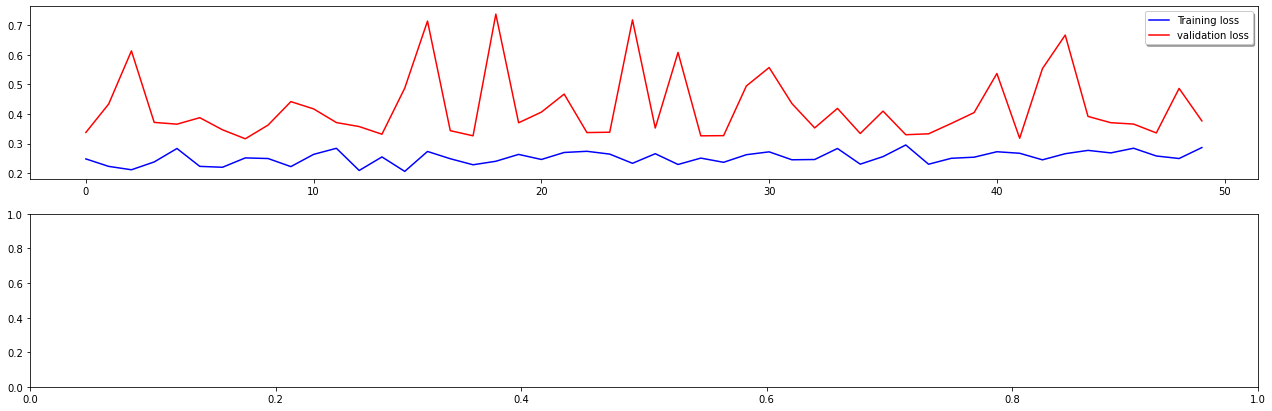

In [180]:

fig, ax = plt.subplots(2,1 , figsize=(22,7))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)


#Confusion Matrix

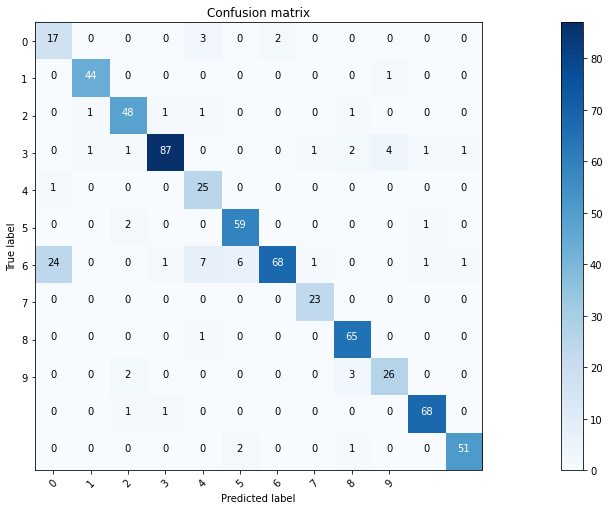

In [182]:

from sklearn.metrics import confusion_matrix
import itertools
plt.subplots(figsize=(22,7)) #set the size of the plot 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

# 6.Visualize the predictions
Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]. (5 Marks)

In [186]:

# Predict the values from the test dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 


[0 0 0 0 0 0 0 0 1 0 0 0]
8


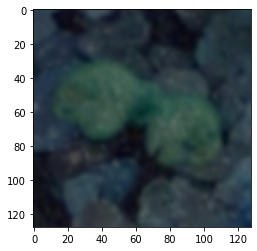

In [191]:
# Visualize the prediction and validating 
plt.imshow(X_test[2])
print (y_test[2])
print (Y_pred_classes[2])
# Prediction is True

[0 0 0 1 0 0 0 0 0 0 0 0]
3


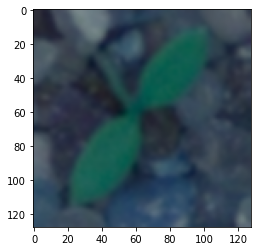

In [192]:
# Visualize the prediction and validating 
plt.imshow(X_test[3])
print (y_test[3])
print (Y_pred_classes[3])
# Prediction is True

[0 0 0 0 0 1 0 0 0 0 0 0]
5


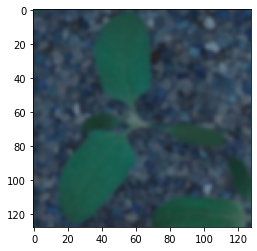

In [193]:
# Visualize the prediction and validating 
plt.imshow(X_test[36])
print (y_test[36])
print (Y_pred_classes[36])
# Prediction is True

[0 0 0 0 0 0 1 0 0 0 0 0]
6


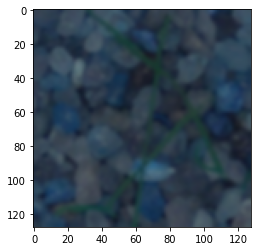

In [194]:
# Visualize the prediction and validating 
plt.imshow(X_test[59])
print (y_test[59])
print (Y_pred_classes[59])
# Prediction is True

[0 0 1 0 0 0 0 0 0 0 0 0]
2


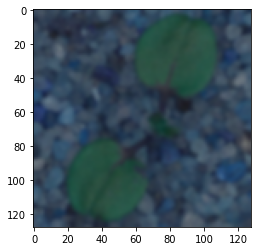

In [195]:
# Visualize the prediction and validating 
plt.imshow(X_test[33])
print (y_test[33])
print (Y_pred_classes[33])
# Prediction is True